## Problem 1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

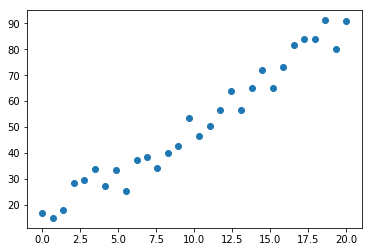

In [2]:
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3.7*train_x + 14 + 4*np.random.randn(n_samples)

train_x = train_x.reshape(30,1)
train_y = train_y.reshape(30,1)

plt.figure(0)
plt.plot(train_x, train_y,'o')
plt.show()

### Scikit-Learn

In [3]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(train_x,train_y)

print('The slope is',linreg.coef_)
print('The intercept is',linreg.intercept_)

The slope is [[3.77966984]]
The intercept is [13.34261994]


### TensorFlow

In [4]:
# Constants
learning_rate = 0.001
epochs = 20000

# Variables
slope = tf.Variable(tf.random_uniform([1],-1.,1.))
intercept = tf.Variable(tf.zeros([1]))
response = slope*train_x + intercept

# Cost and Optimizer
cost = tf.reduce_mean(tf.square(response - train_y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize all variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(epochs):
        sess.run(optimizer)
        
        if step%4000 == 0:
            print("Epoch:%d, cost:%.5f, slope:%f, intercept:%f"
                  %(step,sess.run(cost),sess.run(slope),sess.run(intercept)))
    
    print()
    print('The slope is',sess.run(slope))
    print('The intercept is',sess.run(intercept))

Epoch:0, cost:1513.23120, slope:1.493127, intercept:0.096763
Epoch:4000, cost:23.59009, slope:3.898402, intercept:11.735334
Epoch:8000, cost:22.92176, slope:3.794343, intercept:13.143987
Epoch:12000, cost:22.91156, slope:3.781483, intercept:13.318070
Epoch:16000, cost:22.91141, slope:3.779895, intercept:13.339571

The slope is [3.7797382]
The intercept is [13.3417]


## Problem 2

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd

data = pd.read_csv('00 kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
from sklearn import preprocessing

var_1 = data['bedrooms']
var_1 = preprocessing.minmax_scale(var_1)

var_2 = data['sqft_living']
var_2 = preprocessing.minmax_scale(var_2)

pred_vars_skl = data[['bedrooms','sqft_living']]
pred_vars_skl = preprocessing.minmax_scale(pred_vars_skl)

target = data['price']
target = preprocessing.minmax_scale(target)

/Users/shijizhao/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/Users/shijizhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  # Remove the CWD from sys.path while we load stuff.


### Scikit-Learn

In [7]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(pred_vars_skl,target)

print("The weight of 'bedrooms' is",linreg.coef_[0])
print("The weight of 'sqft_living' is",linreg.coef_[1])
print('The bias is',linreg.intercept_)

The weight of 'bedrooms' is -0.24697744845331246
The weight of 'sqft_living' is 0.5455501754638818
The bias is 0.012526488915412401


### TensorFlow

In [8]:
# Constants
learning_rate = 0.1
epochs = 100000

# Inputs
x1 = tf.placeholder(dtype=tf.float32)
x2 = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Variables
W1 = tf.Variable([0], dtype=tf.float32, name="weight1")
W2 = tf.Variable([0], dtype=tf.float32, name="weight2")
B = tf.Variable([0], dtype=tf.float32, name="bias")

response = W1*x1 + W2*x2 + B

# Cost and Optimizer
cost = tf.reduce_mean(tf.square(response - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize all variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(epochs):
        [op,cst] = sess.run([optimizer,cost],
                            feed_dict={x1:var_1,x2:var_2,y:target})
        
        if step%10000 == 0:
            print("Epoch:%d, cost:%.5f, weight1:%f, weight2:%f, bias:%f"
                  %(step,cst,sess.run(W1),sess.run(W2),sess.run(B)))
    
    print()
    print("The weight of 'bedrooms' is",sess.run(W1))
    print("The weight of 'sqft_living' is",sess.run(W2))
    print('The bias is',sess.run(B))

Epoch:0, cost:0.00604, weight1:0.001330, weight2:0.002117, bias:0.012199
Epoch:10000, cost:0.00115, weight1:-0.112538, weight2:0.510504, bias:0.003524
Epoch:20000, cost:0.00114, weight1:-0.197261, weight2:0.532598, bias:0.009196
Epoch:30000, cost:0.00114, weight1:-0.228588, weight2:0.540751, bias:0.011296
Epoch:40000, cost:0.00114, weight1:-0.240164, weight2:0.543756, bias:0.012073
Epoch:50000, cost:0.00114, weight1:-0.244442, weight2:0.544865, bias:0.012360
Epoch:60000, cost:0.00114, weight1:-0.246033, weight2:0.545299, bias:0.012464
Epoch:70000, cost:0.00114, weight1:-0.246601, weight2:0.545431, bias:0.012504
Epoch:80000, cost:0.00114, weight1:-0.246800, weight2:0.545478, bias:0.012518
Epoch:90000, cost:0.00114, weight1:-0.246841, weight2:0.545487, bias:0.012521

The weight of 'bedrooms' is [-0.24684115]
The weight of 'sqft_living' is [0.54548734]
The bias is [0.01252105]
